# Pretest

This pretest was executed between 29.11.2019 and 02.12.2019. Participants were recruited with the help of Amazon MTurk.

**260** users visited the application during those three days. **169** activities resulted in a conversion, which results in a conversion rate of **65%**. In the case of the pretest, conversion means that the user would be interested in further updates of the service and products. Therefore here submitted his / her contact data.

This Jupyter Notebook presents essential data exploration and evaluation. This experiment studies the effect of _high threat_ (aggressively framed) informational nudges on the user experience, as well as the chosen tariff option for an online insurance product.

## Setup

In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

In [3]:
# import the data
firestore_data = pd.read_json("./firestore.json")
df = firestore_data

# import prepared data with only numeric values. Needed for calculations
df_numeric = pd.read_json("./firestore_numbers.json")

# import survey data
survey_data = pd.read_csv("./survey.csv")

# sort dataframe by date
df = df.sort_values(by=['created'])

# print first five rows
df.head(5)

# export json data as csv for better overview
df.to_csv('./data.csv', encoding='utf-8')

# Demographics
To capture additional demographic data, the participants were asked to fill out a post survey. This survey got 124 valid answers.



In [4]:
# drop duplicates
survey_data = survey_data.drop_duplicates(subset="mturk_id")

len(survey_data)

124

## Age

In [25]:
survey_data.age.value_counts()

18 - 29    51
30 - 39    45
40 - 49    14
> 50       14
Name: age, dtype: int64

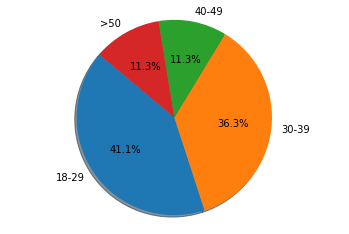

In [35]:
# Data to plot
labels = '18-29', '30-39', '40-49', '>50'
sizes = [51, 45, 14, 14]

# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Gender

In [27]:
survey_data.gender.value_counts()

Male      63
Female    60
Trans      1
Name: gender, dtype: int64

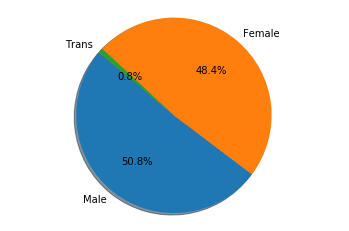

In [34]:
# Data to plot
labels = 'Male', 'Female', 'Trans'
sizes = [63, 60, 1]

# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Education

In [31]:
survey_data.education.value_counts()

4-year College Degree    46
Masters Degree           34
Some College             21
High School / GED        13
2-year College Degree     7
Professional Degree       3
Name: education, dtype: int64

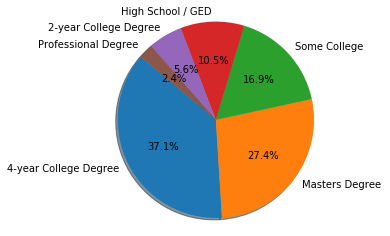

In [33]:
# Data to plot
labels = '4-year College Degree', 'Masters Degree', 'Some College', 'High School / GED', '2-year College Degree', 'Professional Degree' 
sizes = [46, 34, 21, 13,7,3]

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# General Data Description

### Dataset Description
The dataset includes 178 entries of users during the timespan of the pretest. All those users have chosen one of the three tariff options and provided feedback. Overall, 260 unique users visited the website, where 82 users (31,5%) left the website during the choice process. That means none of the options was in the interest of the user. 

The remaining 178 users provided their feedback. 
Out of those 178 users, 169 stated that there were interested in further updates of the service and therefore submitted contact information.

In [10]:
len(df)

178

### Treatment Split and Cancellations
The visitors of the website have been confronted with the nudge in 50% of the time. Out of the 82 users that made no decisions and left the website, 40 users that got the nudge and left. 42 users that visited the website without a nudge left the website and made no decision.

Since 82 of the users left the website before the capturing of the feedback, the balance between treatment and no treatment is not truly 50/50 in the dataset.

The dataset includes the feedback of 90 users that visited the page with the nudge and 88 users who visited the website without a nudge.

In [11]:
df.nudge.value_counts()

1    90
0    88
Name: nudge, dtype: int64

### Chosen Tariff Option
In terms of the chosen tariff option, the _basic_ option is the most popular. 42,2% of the users favored the minimal amount of security. Interestingly, the second most popular option is the complete contrary, the _top_ option. This option is the most expensive one and covers almost every situation.

The _comfort_ tariff, which represents the middle option, was the least chosen. That fact speaks for the existing decision anomalies in insurance product decisions. Usually, the middle option bias tends to present the middle option as the most popular. This shows the first effect of the treatment (nudge).

In [3]:
df.option.value_counts()

basic      83
top        51
comfort    44
Name: option, dtype: int64

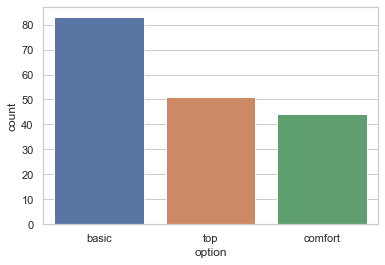

In [10]:
# Add barchart with chosen tariff options
sns.set(style="whitegrid")

# Draw a nested barplot to choice options based on nudge
g = sns.countplot(x="option",data=df, order = df['option'].value_counts().index)


### User Experience and Feedback
Overall, most of the users are _happy_ with the experience of the website. Only a small part has described their experience as _bad_. Besides the effect of the nudge, one primary reason could be the visual appealing of the site. In comparison to other insurance company, the information and focus was very clear and straightforward, which could lead to an overall, more satisfying user experience. 

In [14]:
# most chosen feedback, least chose, average
df.feedback.value_counts()

happy      106
neutral     58
sad         14
Name: feedback, dtype: int64

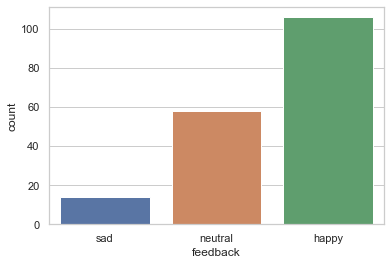

In [17]:
# Add barchart with chosen tariff options
sns.set(style="whitegrid")

# Draw a nested barplot to choice options based on nudge
g = sns.countplot(x="feedback",data=df)


# Effect of Nudging on Customer Experience (feedback)

In [14]:
# mapping of feedback to ordinal category
from pandas.api.types import CategoricalDtype

ordered_feedback = ['sad', 'neutral', 'happy']
df.feedback = df.feedback.astype(CategoricalDtype(ordered=True,categories=ordered_feedback))

### Distribution of Data
If one looks at the distribution of the data concerning the treatment, no significant differences are noticeable. The distribution of different feedback values is almost balanced. The bar plot below shows this observation in a visual way.

In [54]:
# group data by nudge
nudge_group = df.groupby("nudge")
nudge_group.feedback.value_counts()

nudge  feedback
0      happy       52
       neutral     30
       sad          6
1      happy       54
       neutral     28
       sad          8
Name: feedback, dtype: int64

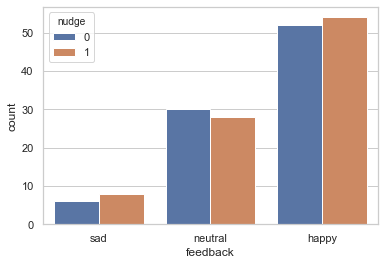

In [16]:
# Add barchart with chosen tariff options
sns.set(style="whitegrid")

# Draw a nested barplot to choice options based on nudge
g = sns.countplot(x="feedback",data=df, hue="nudge")


### Average Treatment Effect

In [82]:
# ATE
nudge_group = df_numeric[df_numeric.nudge == 1].feedback
no_nudge_group = df_numeric[df_numeric.nudge == 0].feedback

mean_nudge =nudge_group.mean()
mean_no_nudge = no_nudge_group.mean()

ate = mean_nudge - mean_no_nudge
print("Average Treatment Effect: %.4f" % ate)

Average Treatment Effect: -0.0116


The negative ATE shows a negative effect on the user experience if a high threat nudge is displayed. Interestingly this negative effect is very low and, therefore, not significant.

### Mann-Withney-U Test
Since the values in the dataset are not normally distributed, a Mann-Withney-U Test is suitable to study the effect of the treatment. In this case, the null hypothesis H0 assumes that the nudge will not affect the user experience.

In [88]:
# Non-parametric Mann Whitney U Test
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

nudge = df[df.nudge == 1].feedback.array
no_nudge = df[df.nudge == 0].feedback.array

# compare samples
stat, p = mannwhitneyu(nudge, no_nudge)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


Statistics=3960.000, p=0.499
Same distribution (fail to reject H0)


# Effect of Nudging on Chosen Tariff Option (option)

In [89]:
# mapping of option to ordinal category
from pandas.api.types import CategoricalDtype

ordered_option = ['basic', 'comfort', 'top']
df.option = df.option.astype(CategoricalDtype(ordered=True,categories=ordered_option))

### Distribution of Data
The distribution of the data concerning the treatment, no significant differences are noticeable. The differently chose tariff options are almost balanced. The swarm plot below shows this observation in a visual way.

In [90]:
# group data by nudge
nudge_group = df.groupby("nudge")
nudge_group.option.value_counts()

nudge  option 
0      basic      44
       top        23
       comfort    21
1      basic      39
       top        28
       comfort    23
Name: option, dtype: int64

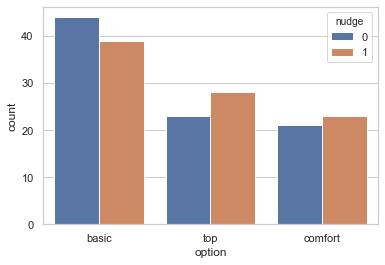

In [11]:
# Add barchart with chosen tariff options
sns.set(style="whitegrid")

# Draw a nested barplot to choice options based on nudge
g = sns.countplot(x="option",data=df, hue="nudge", order = df['option'].value_counts().index)


### Average Treatment Effect

In [92]:
# ATE
nudge_group = df_numeric[df_numeric.nudge == 1].option
no_nudge_group = df_numeric[df_numeric.nudge == 0].option

mean_nudge =nudge_group.mean()
mean_no_nudge = no_nudge_group.mean()

ate = mean_nudge - mean_no_nudge
print("Average Treatment Effect: %.4f" % ate)

Average Treatment Effect: 0.1164


In contrast to the feedback, the treatment shows a positive average effect on the tariff option if a high threat nudge is displayed. Therefore there is a tendency that more expensive options with broader coverage are chosen. As before, the effect is very low and, therefore, not significant.

### Mann-Withney-U Test
Since the values in the dataset are not normally distributed, a Mann-Withney-U Test is suitable to study the effect of the treatment. In this case, the null hypothesis H0 assumes that the nudge will not affect the choice in tariff options.

In [93]:
# Non-parametric Mann Whitney U Test
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

nudge = df[df.nudge == 1].option.array
no_nudge = df[df.nudge == 0].option.array

# compare samples
stat, p = mannwhitneyu(nudge, no_nudge)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


Statistics=3666.500, p=0.179
Same distribution (fail to reject H0)
